In [14]:

# PLEASE NOTE this homework is based on the readme file, not the starter code, when there was a descrepancy between the two.


%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import datetime as dt
 

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Float, Integer, String
#create engine
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [16]:
# View measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9f84546438>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [17]:
#find the last date in the data
session.query(Measurement, Measurement.date).order_by(Measurement.date.desc()).first()


(<sqlalchemy.ext.automap.measurement at 0x9f878c0cc0>, '2017-08-23')

In [18]:
# •	Design a query to retrieve the last 12 months of precipitation data.
conn = engine.connect()
read_df=pd.read_sql("select * from measurement where date between '2016-08-23' and '2017-08-23' order by date ",conn)

#•	Select only the date and prcp values.
meas_df = read_df[["date", "prcp"]]
meas_chart = meas_df.set_index("date")
meas_chart.head()

#•	Sort the DataFrame values by date.
meas_chart = meas_chart.sort_values(["date"], ascending=True)
meas_chart.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


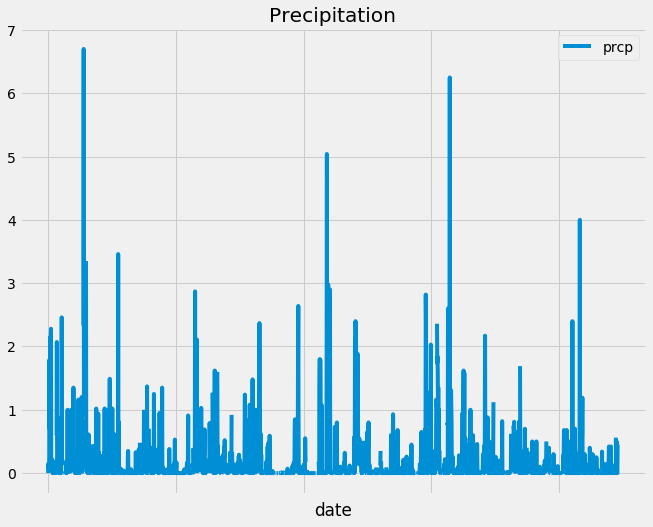

<Figure size 432x288 with 0 Axes>

In [19]:
#HELP
#•	Plot the results using the DataFrame plot method.

# Use DataFrame.plot() in order to create a line chart of the data
meas_chart.plot(kind="line", figsize=(10,8))

# Set a title for the chart
plt.title("Precipitation")
plt.show()
plt.tight_layout()

In [20]:

#Gather the Station Data
stat=pd.read_sql("select * from measurement where date between '2016-08-23' and '2017-08-23' order by id desc ",conn)
stat_df = pd.DataFrame(stat)

#•	Design a query to calculate the total number of stations.
numstat_df = stat_df.groupby("station").count()

county = numstat_df["id"].count()
county



7

In [21]:
#•	Design a query to find the most active stations.
#o	List the stations and observation counts in descending order.

totcount_df = stat_df.groupby("station").count()["id"].reset_index()
totcount_df = totcount_df.sort_values(["id"], ascending=False)
totcount_df = totcount_df.rename(columns={"id": "total count"})
totcount_df


,station,total count
5,USC00519397,361
4,USC00519281,352
2,USC00516128,349
0,USC00513117,343
6,USC00519523,337
1,USC00514830,305
3,USC00517948,183


In [22]:
# o	Which station has the highest number of observations?
totcount_df['total count'].max()

361

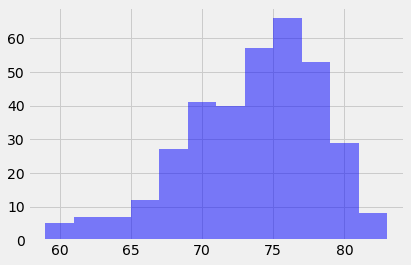

In [23]:
#•	Design a query to retrieve the last 12 months of temperature observation data (tobs).

# NOTE: This does not have a date filter because it's using the dataframe 
# from above which already had the date range selected
tobs_df = stat_df[["station", "tobs"]]

# 	Filter by the station with the highest number of observations.
#NOTE: Retrieved from above code
tobs_df = tobs_df[(tobs_df["station"] == "USC00519281")]
x = tobs_df["tobs"]
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()